In [2]:
#SOURCE https://github.com/Devyanshu/image-split-with-overlap/blob/master/split_image_with_overlap.py
#ORIG
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join

source_originals_path='/space/storage/homes/vrv/cellseg-cuda/data/originals/'
source_labels_path='/space/storage/homes/vrv/cellseg-cuda/data/labels/'
dest_originals_path='/space/storage/homes/vrv/cellseg-cuda/processed_data/512_crop/originals/'
dest_labels_path='/space/storage/homes/vrv/cellseg-cuda/processed_data/512_crop/labels/'
s_o = [f for f in listdir(source_originals_path) if isfile(join(source_originals_path, f))]
s_l = [f for f in listdir(source_labels_path) if isfile(join(source_labels_path, f))]
s_o.sort()
s_l.sort()

def start_points(size, split_size, overlap=0.1):
    points = [0]
    stride = int(split_size * (1-overlap))
    counter = 1
    while True:
        pt = stride * counter
        if pt + split_size >= size:
            points.append(size - split_size)
            break
        else:
            points.append(pt)
        counter += 1
    return points

def image_crop():
    frmt = 'pgm'
    countName=0
    for h in s_l:
        #name = str(count).zfill(5) +"_split"
        img = cv2.imread(source_labels_path+h)
        np.place(img, img == 127, 1)
        np.place(img, img == 128, 1)
        np.place(img, img == 254, 2)
        np.place(img, img == 255, 2)
        img_h, img_w, _ = img.shape
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        split_width = 512
        split_height = 512
        X_points = start_points(img_w, split_width, 0.5)
        Y_points = start_points(img_h, split_height, 0.5)
        for i in Y_points:
            for j in X_points:
                split = img[i:i + split_height, j:j + split_width]
                cv2.imwrite(dest_labels_path+'{}.{}'.format(str(countName).zfill(5), frmt), split)
                countName+=1         

In [3]:

from skimage.io import imread, imshow
from skimage.transform import resize

In [4]:
X_paths = os.listdir(dest_originals_path)
y_paths = os.listdir(dest_labels_path)
X_paths.sort()
y_paths.sort()
nb_img=len(X_paths)
img_height=512
img_width=512
X = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)
y = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)
for i in range(len(X_paths)) : 
    img = imread(dest_originals_path + X_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    X[i]=img
for j in range(len(y_paths)) : 
    img = imread(dest_labels_path + y_paths[j])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y[j]=img

In [5]:
np.save('_512', X)

In [10]:
import matplotlib.pyplot as plt

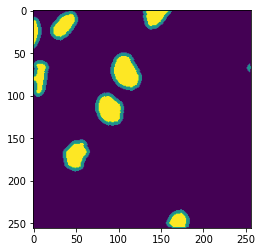

In [12]:
plt.imshow(y[0])

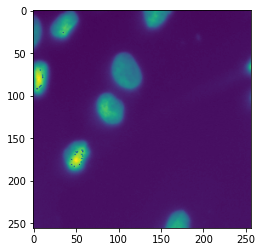

In [13]:
plt.imshow(X[0])

In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()
for img in pbar(y):
    np.place(img, img == 127, 1)
    np.place(img, img == 128, 1)
    np.place(img, img == 254, 1)
    np.place(img, img == 255, 1)

In [2]:
#SOURCE https://github.com/Devyanshu/image-split-with-overlap/blob/master/split_image_with_overlap.py
#LABELS
import cv2

def start_points(size, split_size, overlap=0.1):
    points = [0]
    stride = int(split_size * (1-overlap))
    counter = 1
    while True:
        pt = stride * counter
        if pt + split_size >= size:
            points.append(size - split_size)
            break
        else:
            points.append(pt)
        counter += 1
    return points

def image_crop_labels(i,j):
    count = 0
    frmt = 'pgm'
    for h in range(1,10):
        name = 'bio00' + str(h) + "_split"
        img = cv2.imread(source_labels_path+"bio_00"+ str(h) +"_2col_"+str(h-1)+".pgm")
        img_h, img_w, _ = img.shape
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        split_width = 128
        split_height = 128
        X_points = start_points(img_w, split_width, 0.5)
        Y_points = start_points(img_h, split_height, 0.5)
        for i in Y_points:
            for j in X_points:
                split = img[i:i + split_height, j:j + split_width]
                cv2.imwrite(dest_labels_path+'{}_{}.{}'.format(name, count, frmt), split)
                count += 1
    for h in range(10,40):
        name = 'bio0' + str(h) + "_split"
        img = cv2.imread(source_labels_path+"bio_0"+ str(h) +"_2col_"+str(h-1)+".pgm")
        img_h, img_w, _ = img.shape
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        split_width = 128
        split_height = 128
        X_points = start_points(img_w, split_width, 0.5)
        Y_points = start_points(img_h, split_height, 0.5)
        for i in Y_points:
            for j in X_points:
                split = img[i:i + split_height, j:j + split_width]
                cv2.imwrite(dest_labels_path+'{}_{}.{}'.format(name, count, frmt), split)
                count += 1

In [64]:
dest_originals_path='/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/originals/'
dest_labels_path='/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels/'
d_o=[f for f in listdir(dest_originals_path) if isfile(join(dest_originals_path, f))]
d_l=[f for f in listdir(dest_labels_path) if isfile(join(dest_labels_path, f))]

In [65]:
d_o.sort()
d_l.sort()

In [66]:
d_o[0]

'00000_split_00000.pgm'

In [12]:
len(s_l)


39

In [13]:
len(s_o)

39

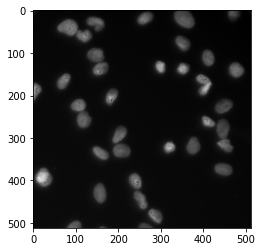

In [15]:
from PIL import Image as im
import matplotlib.pyplot as plt
img=cv2.imread(dest_originals_path+'00003.pgm')
plt.imshow(img, cmap='gray')
plt.show()

In [19]:
img=cv2.imread(dest_labels_path+'00003.pgm')
np.unique(img)

array([0, 1, 2], dtype=uint8)

In [33]:
d_l=[f for f in listdir(dest_labels_path) if isfile(join(dest_labels_path, f))]

In [39]:
d_l.sort()
d_l[-2]

'77450.pgm'

In [40]:
d_o=[f for f in listdir(dest_originals_path) if isfile(join(dest_originals_path, f))]
d_o.sort()
d_o[-2]

'00267_split_00287.pgm'

In [14]:
image_crop()